In [ ]:
import nltk
import string
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Gerekli NLTK verilerini indir
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Dosya yolu
file_path = "C:\\Users\\Milarda\\OneDrive\\Masaüstü\\oyunveri\\cevrilmis_metin.txt"

# 1. Metni oku
with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

# 2. Küçük harf
text = text.lower()

# 3. Sayı ve özel karakter temizliği
text = re.sub(r'[^a-z\s]', '', text)

# 4. Tokenize et
tokens = word_tokenize(text)

# 5. Stopwords çıkar
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# 6. Lemmatization
lemmatizer = WordNetLemmatizer()
lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]

# 7. DataFrame'e çevir
df = pd.DataFrame(lemmatized_tokens, columns=["lemmatized_word"])

# 8. CSV olarak kaydet
df.to_csv("lemmatized.csv", index=False, encoding="utf-8")

print("✅ Lemmatize edilmiş veri 'lemmatized.csv' olarak kaydedildi.")


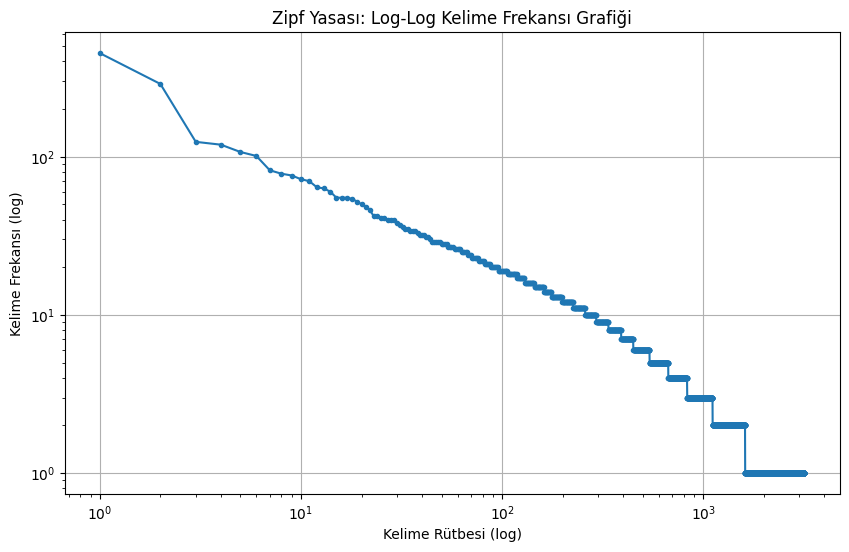

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

# 1. CSV'den veriyi oku
file_path = "C:\\Users\\Milarda\\lemmatized.csv"
df = pd.read_csv(file_path)

# 2. Stemmed kelime listesini al
kelimeler = df["lemmatized_word"].astype(str).tolist()

# 3. Kelime sıklığı sayımı
kelime_sayacı = Counter(kelimeler)

# 4. Sıklıkları sırala
sıklıklar = sorted(kelime_sayacı.values(), reverse=True)
rütbeler = range(1, len(sıklıklar) + 1)

# 5. Log-log grafiği çiz
plt.figure(figsize=(10, 6))
plt.loglog(rütbeler, sıklıklar, marker=".")
plt.title("Zipf Yasası: Log-Log Kelime Frekansı Grafiği")
plt.xlabel("Kelime Rütbesi (log)")
plt.ylabel("Kelime Frekansı (log)")
plt.grid(True)
plt.show()


In [6]:
import pandas as pd
import string

def kelime_sayisi(metin):
    # Noktalama işaretlerini çıkar
    metin = metin.translate(str.maketrans("", "", string.punctuation))
    
    # Küçük harfe çevir ve boşluklara göre ayır
    kelimeler = metin.lower().split()
    return len(kelimeler)

# CSV dosyasını oku
file_path = "C:\\Users\\Milarda\\lemmatized.csv"
df = pd.read_csv(file_path)

# "lemmatized_word" sütunundaki kelimeleri birleştir
metin = " ".join(df["lemmatized_word"].astype(str).tolist())

# Kelime sayısını hesapla
print("Kelime sayısı:", kelime_sayisi(metin))


Kelime sayısı: 13304


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk

# Gerekli NLTK kaynaklarını indir
nltk.download('punkt')
nltk.download('stopwords')

# Lemmatize edilmiş kelimeleri oku
file_path = "C:\\Users\\Milarda\\lemmatized.csv"
df = pd.read_csv(file_path)

# Kelimeleri bir cümle olarak birleştir (TF-IDF cümle bazlı çalışır)
metin = " ".join(df["lemmatized_word"].astype(str).tolist())
metinler = [metin]  # Tek bir metin olarak listeye al

# Stop words listesi
stop_words = set(stopwords.words('english'))

# Metni temizle (tokenizasyon + stop word çıkarımı + noktalama temizliği)
metinler_temiz = []
for m in metinler:
    kelimeler = word_tokenize(m.lower())
    temiz_kelime = [kelime for kelime in kelimeler if kelime not in stop_words and kelime.isalpha()]
    metinler_temiz.append(" ".join(temiz_kelime))

# TF-IDF vektörizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(metinler_temiz)

# DataFrame'e dönüştür
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# CSV'ye yaz
tfidf_df.to_csv("onem.csv", index=False, encoding="utf-8")

print("✅ Dosya başarıyla oluşturuldu: onem.csv")


✅ Dosya başarıyla oluşturuldu: onem.csv


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Milarda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
import gensim
from gensim.models import Word2Vec
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer


# Wikipedia sayfasını indiriyoruz
# Lemmatize edilmiş kelimeleri oku
file_path = "C:\\Users\\Milarda\\lemmatized.csv"
df = pd.read_csv(file_path)

# Cümlelere ayırma
sentences = sent_tokenize(file_path)

# Lemmatizer ve Stemmer'ı başlat
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

# Stopwords listesini almak
stop_words = set(stopwords.words('english'))

# Kelimeleri tokenleştirip, lemmatize etme ve stemleme
def preprocess_sentence(sentence):
    tokens = word_tokenize(sentence)  # Cümleyi kelimelere ayır
    # Sadece harf olan kelimeleri al ve stopword'leri çıkar
    filtered_tokens = [token.lower() for token in tokens if token.isalpha() and token.lower() not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]  # Lemmatize etme
    stemmed_tokens = [stemmer.stem(token) for token in filtered_tokens]  # Stemleme
    return lemmatized_tokens, stemmed_tokens

# Her cümleyi tokenleştir, lemmatize et ve stemle
tokenized_corpus_lemmatized = []
tokenized_corpus_stemmed = []
for sentence in sentences:
    lemmatized_tokens, stemmed_tokens = preprocess_sentence(sentence)
    tokenized_corpus_lemmatized.append(lemmatized_tokens)
    tokenized_corpus_stemmed.append(stemmed_tokens)

# Word2Vec modeli eğitmek için parametreler
parameters = [
    {'model_type': 'cbow', 'window': 2, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 100},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 100},
    {'model_type': 'cbow', 'window': 2, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 2, 'vector_size': 300},
    {'model_type': 'cbow', 'window': 4, 'vector_size': 300},
    {'model_type': 'skipgram', 'window': 4, 'vector_size': 300}
]

# Fonksiyon ile Word2Vec modeli eğitme ve kaydetme
def train_and_save_model(corpus, params, model_name):
    model = Word2Vec(corpus, vector_size=params['vector_size'], window=params['window'], min_count=1, sg=1 if params['model_type'] == 'skipgram' else 0)
    model.save(f"{model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model")
    print(f"{model_name}_{params['model_type']}_window{params['window']}_dim{params['vector_size']}.model saved!")

# Lemmatize edilmiş corpus ile modelleri eğitme ve kaydetme
for param in parameters:
    train_and_save_model(tokenized_corpus_lemmatized, param, "lemmatized_model")




lemmatized_model_cbow_window2_dim100.model saved!
lemmatized_model_skipgram_window2_dim100.model saved!
lemmatized_model_cbow_window4_dim100.model saved!
lemmatized_model_skipgram_window4_dim100.model saved!
lemmatized_model_cbow_window2_dim300.model saved!
lemmatized_model_skipgram_window2_dim300.model saved!
lemmatized_model_cbow_window4_dim300.model saved!
lemmatized_model_skipgram_window4_dim300.model saved!


In [11]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity

# Tüm model bilgileri
model_configurations = [
    {"prefix": "lemmatized_model", "type": "cbow", "window": 2, "dim": 100},
    {"prefix": "lemmatized_model", "type": "skipgram", "window": 2, "dim": 100},
    {"prefix": "lemmatized_model", "type": "cbow", "window": 4, "dim": 100},
    {"prefix": "lemmatized_model", "type": "skipgram", "window": 4, "dim": 100},
    {"prefix": "lemmatized_model", "type": "cbow", "window": 2, "dim": 300},
    {"prefix": "lemmatized_model", "type": "skipgram", "window": 2, "dim": 300},
    {"prefix": "lemmatized_model", "type": "cbow", "window": 4, "dim": 300},
    {"prefix": "lemmatized_model", "type": "skipgram", "window": 4, "dim": 300}
]

# Ortak fonksiyon
def ortalama_vektor(cumle, model):
    kelimeler = cumle.split()
    vektorler = [model.wv[k] for k in kelimeler if k in model.wv]
    if not vektorler:
        return np.zeros(model.vector_size)
    return np.mean(vektorler, axis=0)

def top5_benzerlik(model_path, csv_path, model_label, output_csv, girilen_index=14):
    model = Word2Vec.load(model_path)
    df = pd.read_csv(csv_path)
    sentences = df["sentence"].tolist()
    vektorler = np.array([ortalama_vektor(c, model) for c in sentences])
    girilen_vektor = vektorler[girilen_index].reshape(1, -1)
    skorlar = cosine_similarity(girilen_vektor, vektorler)[0]
    skorlar[girilen_index] = -1
    ilk_5_index = np.argsort(skorlar)[-5:][::-1]
    ilk_5_skorlar = skorlar[ilk_5_index]
    sonuc_df = pd.DataFrame({
        "model": [model_label] * 5,
        "index": ilk_5_index,
        "cosine_score": ilk_5_skorlar
    })
    sonuc_df.to_csv(output_csv, index=False, encoding="utf-8")
    print(f"✅ {model_label} sonucu {output_csv} dosyasına yazıldı.")

# Tüm modelleri sırayla çalıştır
for config in model_configurations:
    prefix = config["prefix"]
    model_type = config["type"]
    window = config["window"]
    dim = config["dim"]
    
    model_filename = f"{prefix}_{model_type}_window{window}_dim{dim}.model"
    model_path = f"C:\\Users\\Milarda\\{model_filename}"
    
    # Doğru CSV dosyasını seç
    csv_name = "lemmatized_sentences.csv" if "lemmatized" in prefix else "stemmed_sentences.csv"
    csv_path = f"C:\\Users\\Milarda\\Downloads\\{csv_name}"
    
    label = f"{model_type}_win{window}_dim{dim}_{'lemmatized' if 'lemmatized' in prefix else 'stemmed'}"
    output_csv = f"top5_{label}.csv"
    
    top5_benzerlik(model_path, csv_path, label, output_csv)


✅ cbow_win2_dim100_lemmatized sonucu top5_cbow_win2_dim100_lemmatized.csv dosyasına yazıldı.
✅ skipgram_win2_dim100_lemmatized sonucu top5_skipgram_win2_dim100_lemmatized.csv dosyasına yazıldı.
✅ cbow_win4_dim100_lemmatized sonucu top5_cbow_win4_dim100_lemmatized.csv dosyasına yazıldı.
✅ skipgram_win4_dim100_lemmatized sonucu top5_skipgram_win4_dim100_lemmatized.csv dosyasına yazıldı.
✅ cbow_win2_dim300_lemmatized sonucu top5_cbow_win2_dim300_lemmatized.csv dosyasına yazıldı.
✅ skipgram_win2_dim300_lemmatized sonucu top5_skipgram_win2_dim300_lemmatized.csv dosyasına yazıldı.
✅ cbow_win4_dim300_lemmatized sonucu top5_cbow_win4_dim300_lemmatized.csv dosyasına yazıldı.
✅ skipgram_win4_dim300_lemmatized sonucu top5_skipgram_win4_dim300_lemmatized.csv dosyasına yazıldı.


In [15]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

# ------------------------------
# 1. Dosya Yolu ve Örnek Cümle
# ------------------------------
csv_path = "C:\\Users\Milarda\\Downloads\\lemmatized_sentences.csv"  # veya "stemmed_sentences.csv"
model_path = "lemmatized_model_skipgram_window4_dim300.model"  # Modeline göre değiştir

# Örnek cümle indexi
ornek_index = 25

# ------------------------------
# 2. Cümleleri Yükle
# ------------------------------
df = pd.read_csv(csv_path)
metinler = df["sentence"].tolist()
ornek_cumle = metinler[ornek_index]
print(f"\n🎯 Örnek Cümle [{ornek_index}]:\n{ornek_cumle}\n")

# ------------------------------
# 3. TF-IDF ile Benzerlik
# ------------------------------
print("🔍 TF-IDF Benzerlik Sonuçları:")
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(metinler)
ornek_vec = tfidf_matrix[ornek_index]

# Benzerlikleri hesapla
tfidf_scores = cosine_similarity(ornek_vec, tfidf_matrix)[0]
tfidf_scores[ornek_index] = -1  # Kendini hariç tut

# En benzer 5 cümleyi bul
top5_tfidf_idx = tfidf_scores.argsort()[-5:][::-1]
for i in top5_tfidf_idx:
    print(f"• {df.iloc[i]['sentence']} (score: {tfidf_scores[i]:.4f})")

# ------------------------------
# 4. Word2Vec ile Benzerlik
# ------------------------------
print("\n🤖 Word2Vec Benzerlik Sonuçları:")
model = Word2Vec.load(model_path)

def ortalama_vektor(cumle, model):
    kelimeler = cumle.split()
    vektorler = [model.wv[w] for w in kelimeler if w in model.wv]
    if not vektorler:
        return np.zeros(model.vector_size)
    return np.mean(vektorler, axis=0)

# Tüm cümleleri vektörle
w2v_vektorler = np.array([ortalama_vektor(c, model) for c in metinler])
ornek_vec_w2v = w2v_vektorler[ornek_index].reshape(1, -1)

# Benzerlikleri hesapla
w2v_scores = cosine_similarity(ornek_vec_w2v, w2v_vektorler)[0]
w2v_scores[ornek_index] = -1

# En benzer 5 cümleyi bul
top5_w2v_idx = w2v_scores.argsort()[-5:][::-1]
for i in top5_w2v_idx:
    print(f"• {df.iloc[i]['sentence']} (score: {w2v_scores[i]:.4f})")



🎯 Örnek Cümle [25]:
red dead redemption open world actionsequence game developed rockstar game

🔍 TF-IDF Benzerlik Sonuçları:
• point view red dead redemption offer action game full cowboy (score: 0.4115)
• result red dead redemption cowboy game epic story describes human (score: 0.4078)
• result red dead redemption groundbreaking production according visual sense attracts (score: 0.3587)
• v openworld actionmaster game developed rockstar game released gta v (score: 0.3069)
• modern open world game super mario odyssey platformadventure game developed (score: 0.2417)

🤖 Word2Vec Benzerlik Sonuçları:
• game unique twist genre (score: 0.0000)
• moral choice made use power player decision affect story shaped (score: 0.0000)
• fascinating atmosphere world witchcraft inside hogwarts castle class library portrait (score: 0.0000)
• hidden passage fan one one compatible detail read book film (score: 0.0000)
• music make familiar spirit harry potter universe alive result hogwarts (score: 0.0000